In [1]:
!mkdir -p ~/.kaggle


In [3]:
!mv kaggle.json ~/.kaggle


In [ ]:
!ls -lah /.


total 456K
drwxr-xr-x   1 root root 4.0K Nov 16 14:31 .
drwxr-xr-x   1 root root 4.0K Nov 16 14:31 ..
lrwxrwxrwx   1 root root    7 Jun 27  2024 bin -> usr/bin
drwxr-xr-x   2 root root 4.0K Apr 18  2022 boot
drwxr-xr-x   1 root root 4.0K Nov 16 14:31 content
-rw-r--r--   1 root root 4.3K Jul 10  2024 cuda-keyring_1.1-1_all.deb
drwxr-xr-x   1 root root 4.0K Nov 13 14:16 datalab
drwxr-xr-x   5 root root  360 Nov 16 14:19 dev
-rwxr-xr-x   1 root root    0 Nov 16 14:19 .dockerenv
drwxr-xr-x   1 root root 4.0K Nov 16 14:19 etc
drwxr-xr-x   2 root root 4.0K Apr 18  2022 home
drwxr-xr-x   3 root root 4.0K Nov 16 14:19 kaggle
lrwxrwxrwx   1 root root    7 Jun 27  2024 lib -> usr/lib
lrwxrwxrwx   1 root root    9 Jun 27  2024 lib32 -> usr/lib32
lrwxrwxrwx   1 root root    9 Jun 27  2024 lib64 -> usr/lib64
lrwxrwxrwx   1 root root   10 Jun 27  2024 libx32 -> usr/libx32
drwxr-xr-x   2 root root 4.0K Jun 27  2024 media
drwxr-xr-x   2 root root 4.0K Jun 27  2024 mnt
-rw-r--r--   1 root root  17K Ju

In [ ]:
!mv kaggle.json ~/.kaggle/


In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
#!/bin/bash
!kaggle datasets download datamunge/sign-language-mnist

Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
License(s): CC0-1.0
  0% 0.00/62.6M [00:00<?, ?B/s]
100% 62.6M/62.6M [00:00<00:00, 1.72GB/s]


In [6]:
!unzip sign-language-mnist.zip

Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [34]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import PIL
import cv2
import pandas as pd
import matplotlib.pyplot as plt


In [35]:
test_df = pd.read_csv('sign_mnist_test.csv')
train_df = pd.read_csv('sign_mnist_train.csv')


In [36]:
len(train_df)

27455

In [37]:
list(train_df['label'].unique())

[np.int64(3),
 np.int64(6),
 np.int64(2),
 np.int64(13),
 np.int64(16),
 np.int64(8),
 np.int64(22),
 np.int64(18),
 np.int64(10),
 np.int64(20),
 np.int64(17),
 np.int64(19),
 np.int64(21),
 np.int64(23),
 np.int64(24),
 np.int64(1),
 np.int64(12),
 np.int64(11),
 np.int64(15),
 np.int64(4),
 np.int64(0),
 np.int64(5),
 np.int64(7),
 np.int64(14)]

In [38]:
train_df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [39]:
first = train_df.iloc[0,1:]

In [40]:

first = first.values.reshape(28,28)

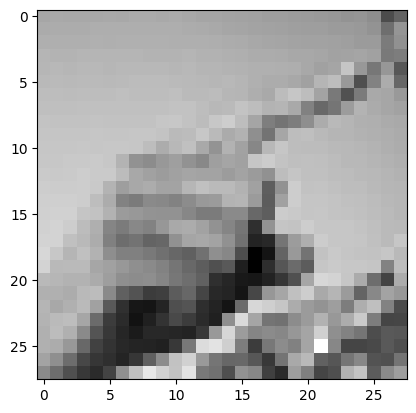

In [41]:
first = train_df.iloc[1, 1:].values.reshape(28, 28)
plt.imshow(first, cmap='gray')
plt.show()


In [42]:
train_ds = train_df.iloc[:,1:].values/255
train_ds = train_ds.reshape(-1,28,28,1)

In [43]:
test_ds = test_df.iloc[:,1:].values/255
test_ds = test_ds.reshape(-1,28,28,1)

In [44]:
y_test = test_df.iloc[:,0]
len(y_test)

7172

In [45]:
train_ds.shape

(27455, 28, 28, 1)

In [46]:
y_train = train_df.iloc[:,0]
len(y_train)

27455

In [47]:
len(y_train.unique())

24

In [48]:
from tensorflow import keras
from tensorflow.keras import layers


In [66]:
tf.keras.backend.clear_session()

In [67]:
def defineBlock(filters, size, padding_Conv, activation, inputs, dropout):
    x = layers.Conv2D(filters, (size, size), padding=padding_Conv, activation=activation)(inputs)
    x = layers.MaxPooling2D(pool_size=(2,2), padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout)(x)
    return x

def defineDense(inputs, units, activation, dropout=False):
    x = layers.Dense(units, activation=activation)(inputs)
    if dropout:
        x = layers.Dropout(0.3)(x)
    return x





In [68]:
inputs = layers.Input(shape=train_ds[0].shape)

B1 = defineBlock(128, 3, 'same', 'relu', inputs, 0.3)
B2 = defineBlock(256, 3, 'same', 'relu', B1, 0.3)
B3 = defineBlock(512, 3, 'same', 'relu', B2, 0.3)
B4 = defineBlock(1024, 3, 'same', 'relu', B3, 0.3)

F = layers.Flatten()(B4)

B4 = defineDense(F, 389, 'relu', True)
B5 = defineDense(B4, 784, 'relu', False)
outputs = defineDense(B5, 25, 'softmax', False)

model = keras.Model(inputs=inputs, outputs=outputs)

In [69]:
len(y_train.unique())

24

In [70]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1, 1, 1024)     │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 389)            │       398,725 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 389)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │       305,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │        19,625 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,928,014 (26.43 MB)

 Trainable params: 6,924,174 (26.41 MB)

 Non-trainable params: 3,840 (15.00 KB)

In [71]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)


In [72]:
history = model.fit(train_ds,y_train,batch_size=32,epochs=10,validation_split=0.2)

Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 30s 29ms/step - accuracy: 0.6042 - loss: 1.3232 - val_accuracy: 0.7301 - val_loss: 0.9522
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9732 - loss: 0.0872 - val_accuracy: 0.8960 - val_loss: 0.4186
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9821 - loss: 0.0595 - val_accuracy: 0.9452 - val_loss: 0.2285
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9817 - loss: 0.0671 - val_accuracy: 0.9570 - val_loss: 0.1411
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9827 - loss: 0.0613 - val_accuracy: 0.9217 - val_loss: 0.3391
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9881 - loss: 0.0445 - val_accuracy: 0.9996 - val_loss: 0.0012
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9917 - loss: 0.0336 - val_accuracy: 0.9536 - val_loss: 0.2005
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9894 - loss: 0.0461 - 

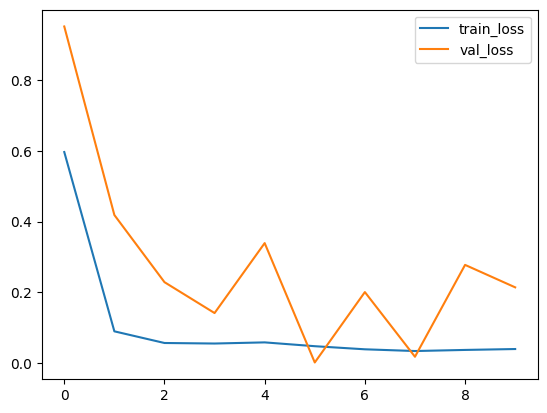

In [73]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

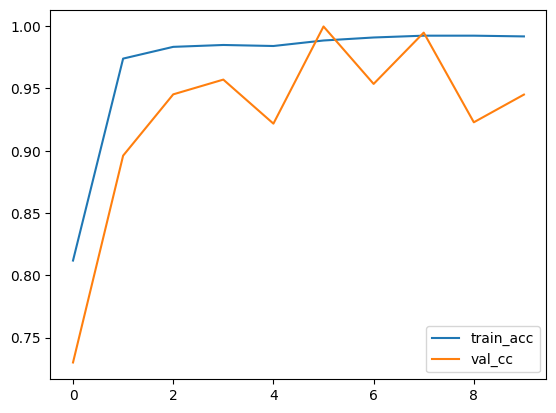

In [74]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_cc')
plt.legend()
plt.show()

In [75]:
model.evaluate(test_ds,y_test)

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8598 - loss: 0.7388


[0.7751902341842651, 0.854015588760376]